In [ ]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Data Pre-Processing

In [ ]:
link = 'https://docs.google.com/spreadsheets/d/1dBSZbH92KkXCJ4m-W8XxAC724McK-JCml1btPzNzE2o/export'

In [ ]:
df = pd.read_excel(link)
df.shape

(24453, 9)

## Changing Datetime Format

In [ ]:
def read():    
  
    df["tanggal"] = pd.to_datetime(df['tanggal'])
    return df

read()

,tanggal,id_transaksi,id_donatur,nominal,akad,program,payment,platform,type_trans
0,2022-03-12 07:48:12,47409.0,31812.0,100000.0,Wakaf,Gerakan Wakaf 10.000 Al Quran untuk Indonesia,gopay,CFD v2,ONLINE_DONATION
1,2022-03-12 07:37:43,47408.0,31812.0,100000.0,Infaq Sedekah,"Yuk Sedekah Jumat, Berbagi Makan dengan Para Tamu",gopay,CFD v2,ONLINE_DONATION
2,2022-03-12 06:29:53,47400.0,25104.0,20000.0,Infaq Sedekah,sedekah subuh,BRI,Android,ONLINE_DONATION
3,2022-03-12 05:03:13,47399.0,28057.0,50000.0,Panti Asuhan,Panti Asuhan Kahfi 2 Jakarta Selatan,gopay,CFD v2,ONLINE_DONATION
4,2022-03-11 20:09:57,4413.0,18008.0,50000.0,Zakat Penghasilan,Zakat Penghasilan,bank_transfer,CFD v2,ONLINE_ZAKAT
...,...,...,...,...,...,...,...,...,...
24448,2019-12-23 17:00:00,32.0,27250.0,250000.0,Zakat Penghasilan,Zakat Penghasilan,Gopay,NaN,ONLINE_ZAKAT
24449,2019-12-17 17:00:00,129.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION
24450,2019-12-17 17:00:00,130.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION
24451,2019-12-17 17:00:00,137.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION


## Missing Dates

In [ ]:
def tanggal_clean():

    df = read()

    row_value1=['2019-12-18',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value2=['2019-12-19',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value3=['2019-12-20',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value4=['2019-12-21',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value5=['2019-12-22',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value6=['2019-12-24',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value7=['2019-12-25',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value8=['2019-12-28',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value9=['2019-12-30',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value10=['2019-12-31',0,0,0,'unknown','unknown','unknown','unknown','unknown']

    row_value11=['2020-01-02',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value12=['2020-01-03',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value13=['2020-01-04',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value14=['2020-01-06',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value15=['2020-01-07',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value16=['2020-01-08',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value17=['2020-01-11',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value18=['2020-01-12',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value19=['2020-01-13',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value20=['2020-01-18',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value21=['2020-01-21',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value22=['2020-01-23',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value23=['2020-01-25',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value24=['2020-01-27',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value25=['2020-01-28',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value26=['2020-01-29',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value27=['2020-01-30',0,0,0,'unknown','unknown','unknown','unknown','unknown']

    row_value28=['2020-02-04',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value29=['2020-02-05',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value30=['2020-02-08',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value31=['2020-02-11',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value32=['2020-02-12',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value33=['2020-02-13',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value34=['2020-02-15',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value35=['2020-02-16',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value36=['2020-02-19',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value37=['2020-02-24',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value38=['2020-02-29',0,0,0,'unknown','unknown','unknown','unknown','unknown']

    row_value39=['2020-03-02',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value40=['2020-03-07',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value41=['2020-03-08',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value42=['2020-03-09',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value43=['2020-03-11',0,0,0,'unknown','unknown','unknown','unknown','unknown']
    row_value44=['2020-03-16',0,0,0,'unknown','unknown','unknown','unknown','unknown']

    row_value45=['2020-04-19',0,0,0,'unknown','unknown','unknown','unknown','unknown']

    row_value46=['2020-11-16',0,0,0,'unknown','unknown','unknown','unknown','unknown']

    row_value47=['2020-12-27',0,0,0,'unknown','unknown','unknown','unknown','unknown']

    # tahun 2019 bulan 12
    df.loc[24448.5] = row_value1
    df.loc[24448.4] = row_value2
    df.loc[24448.3] = row_value3
    df.loc[24448.2] = row_value4
    df.loc[24448.1] = row_value5
    df.loc[24445.3] = row_value6
    df.loc[24445.2] = row_value7
    df.loc[24443.5] = row_value8
    df.loc[24442.2] = row_value9
    df.loc[24442.1] = row_value10

    # tahun 2020 bulan 1
    df.loc[24441.3] = row_value11
    df.loc[24441.2] = row_value12
    df.loc[24441.1] = row_value13
    df.loc[24440.3] = row_value14
    df.loc[24440.2] = row_value15
    df.loc[24440.1] = row_value16
    df.loc[24438.3] = row_value17
    df.loc[24438.2] = row_value18
    df.loc[24438.1] = row_value19
    df.loc[24433.1] = row_value20
    df.loc[24431.1] = row_value21
    df.loc[24430.1] = row_value22
    df.loc[24426.1] = row_value23
    df.loc[24425.4] = row_value24
    df.loc[24425.3] = row_value25
    df.loc[24425.2] = row_value26
    df.loc[24425.1] = row_value27

    # tahun 2020 bulan 2
    df.loc[24414.2] = row_value28
    df.loc[24414.1] = row_value29
    df.loc[24412.1] = row_value30
    df.loc[24410.3] = row_value31
    df.loc[24410.2] = row_value32
    df.loc[24410.1] = row_value33
    df.loc[24409.2] = row_value34
    df.loc[24409.1] = row_value35
    df.loc[24404.1] = row_value36
    df.loc[24391.1] = row_value37
    df.loc[24381.1] = row_value38


    # tahun 2020 bulan 3 dan lainnya
    df.loc[24380.1] = row_value39
    df.loc[24369.3] = row_value40
    df.loc[24369.2] = row_value41
    df.loc[24369.1] = row_value42
    df.loc[24368.1] = row_value43
    df.loc[24360.1] = row_value44
    df.loc[24010.1] = row_value45
    df.loc[14625.1] = row_value46
    df.loc[13520.1] = row_value47

    df['tanggal'] = pd.to_datetime(df['tanggal'].dt.strftime('%Y-%m-%d'))
    df = df.sort_index()


    return df

tanggal_clean()

,tanggal,id_transaksi,id_donatur,nominal,akad,program,payment,platform,type_trans
0.0,2022-03-12,47409.0,31812.0,100000.0,Wakaf,Gerakan Wakaf 10.000 Al Quran untuk Indonesia,gopay,CFD v2,ONLINE_DONATION
1.0,2022-03-12,47408.0,31812.0,100000.0,Infaq Sedekah,"Yuk Sedekah Jumat, Berbagi Makan dengan Para Tamu",gopay,CFD v2,ONLINE_DONATION
2.0,2022-03-12,47400.0,25104.0,20000.0,Infaq Sedekah,sedekah subuh,BRI,Android,ONLINE_DONATION
3.0,2022-03-12,47399.0,28057.0,50000.0,Panti Asuhan,Panti Asuhan Kahfi 2 Jakarta Selatan,gopay,CFD v2,ONLINE_DONATION
4.0,2022-03-11,4413.0,18008.0,50000.0,Zakat Penghasilan,Zakat Penghasilan,bank_transfer,CFD v2,ONLINE_ZAKAT
...,...,...,...,...,...,...,...,...,...
24448.5,2019-12-18,0.0,0.0,0.0,unknown,unknown,unknown,unknown,unknown
24449.0,2019-12-17,129.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION
24450.0,2019-12-17,130.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION
24451.0,2019-12-17,137.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,NaN,ONLINE_DONATION


In [ ]:
def skip_check():
  
    x = tanggal_clean()
    return pd.date_range(start='2019-12-17', end='2022-03-12').difference(x.tanggal)

skip_check()

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

## Payment Cleaning

In [ ]:
def payment_clean():

    df = tanggal_clean()

    df[df['payment'].isna() == True] = df[df['payment'].isna() == True].replace(np.nan, 'unknown')
    df['payment'] = df['payment'].str.lower()
    df['payment'] = df['payment'].str.replace('[-\d]','',regex=True)
    df['payment'] = df['payment'].str.replace('_',' ',regex=True)
    df['payment'] = df['payment'].str.replace('transfer bank','',regex=True)
    df['payment'] = df['payment'].str.replace('(yayasan) mizan amanah','',regex=True)
    df['payment'] = df['payment'].str.replace('mizan amanah','',regex=True)
    df['payment'] = df['payment'].str.replace('va','',regex=True)
    df['payment'] = df['payment'].str.replace('edc','',regex=True)
    df['payment'] = df['payment'].str.replace('madndiri','mandiri',regex=True)
    df['payment'] = df['payment'].str.replace('gani','',regex=True)
    df['payment'] = df['payment'].str.replace('yayasan mizan amanah','',regex=True)
    df['payment'] = df['payment'].str.replace('creditcard','credit card',regex=True)
    df['payment'] = df['payment'].str.replace('echannel','e-channel',regex=True)
    df['payment'] = df['payment'].str.replace('bni syariah','bank syariah indonesia',regex=True)
    df['payment'] = df['payment'].str.replace('mandiri syariah','bank syariah indonesia',regex=True)

    df['payment'] = df['payment'].str.strip()

    return df
    
payment_clean()

,tanggal,id_transaksi,id_donatur,nominal,akad,program,payment,platform,type_trans
0.0,2022-03-12,47409.0,31812.0,100000.0,Wakaf,Gerakan Wakaf 10.000 Al Quran untuk Indonesia,gopay,CFD v2,ONLINE_DONATION
1.0,2022-03-12,47408.0,31812.0,100000.0,Infaq Sedekah,"Yuk Sedekah Jumat, Berbagi Makan dengan Para Tamu",gopay,CFD v2,ONLINE_DONATION
2.0,2022-03-12,47400.0,25104.0,20000.0,Infaq Sedekah,sedekah subuh,bri,Android,ONLINE_DONATION
3.0,2022-03-12,47399.0,28057.0,50000.0,Panti Asuhan,Panti Asuhan Kahfi 2 Jakarta Selatan,gopay,CFD v2,ONLINE_DONATION
4.0,2022-03-11,4413.0,18008.0,50000.0,Zakat Penghasilan,Zakat Penghasilan,bank transfer,CFD v2,ONLINE_ZAKAT
...,...,...,...,...,...,...,...,...,...
24448.5,2019-12-18,0.0,0.0,0.0,unknown,unknown,unknown,unknown,unknown
24449.0,2019-12-17,129.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,gopay,NaN,ONLINE_DONATION
24450.0,2019-12-17,130.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,gopay,NaN,ONLINE_DONATION
24451.0,2019-12-17,137.0,25812.0,100.0,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,gopay,NaN,ONLINE_DONATION


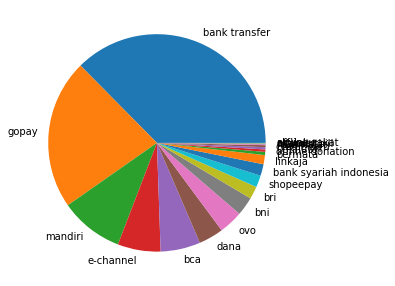

In [ ]:
pay = payment_clean()
plt.figure(figsize=(15,5))
plt.pie(pay['payment'].value_counts(), labels=pay['payment'].value_counts().index);

## Payment Check

In [ ]:
def payment_check():

    payment = payment_clean()

    unique = payment.payment.unique()
    nunique = (f"number of unique values = {payment.payment.nunique()}")
    null = (f"null values = {payment.payment.isna().sum()}")
    
    return unique, nunique, null

payment_check()

(array(['gopay', 'bri', 'bank transfer', 'bca', 'mandiri',
        'bank syariah indonesia', 'bni', 'dana', 'linkaja',
        'offline zakat', 'credit card', 'shopeepay', 'permata', 'akulaku',
        'alfamart', 'ovo', 'muamalat', 'offline donation', 'e-channel',
        'unknown', 'mandiri bill'], dtype=object),
 'number of unique values = 21',
 'null values = 0')

## Pendapatan Grouping

In [ ]:
def pendapatan_group():

    df = payment_clean()

    grup = df.groupby([df.tanggal.dt.year, df.tanggal.dt.month])['nominal'].agg(pendapatan=np.sum)
    grup = grup.rename(columns={'pendapatan':"pendapatan per bulan"})
    grup.index = pd.MultiIndex.from_tuples(grup.index, names=['tahun','bulan'])
    grup = grup.reset_index()

    grup2 = df.groupby([df.tanggal.dt.year])['nominal'].agg(total=np.sum)
    grup2 = grup2.rename(columns={'total':"pendapatan per tahun"})
    grup2 = grup2.reset_index()
    grup2 = grup2.rename(columns={'tanggal':'tahun'})

    merge = pd.merge(grup, grup2, how='outer', on='tahun')
    merge['pendapatan per bulan'] = merge['pendapatan per bulan'].astype(int)
    merge['pendapatan per bulan'] = merge['pendapatan per bulan'].apply('{:,}'.format)
    merge['pendapatan per bulan'] = merge['pendapatan per bulan'].replace(',','.', regex=True)
    merge['pendapatan per tahun'] = merge['pendapatan per tahun'].astype(int)
    merge['pendapatan per tahun'] = merge['pendapatan per tahun'].apply('{:,}'.format)
    merge['pendapatan per tahun'] = merge['pendapatan per tahun'].replace(',','.', regex=True)
    merge['pendapatan per tahun'] = merge['pendapatan per tahun'].drop_duplicates()
    merge['pendapatan per tahun'] = merge['pendapatan per tahun'].fillna(' ')
    merge = merge.set_index(['tahun','bulan'])

    return merge

pendapatan_group()

pendapatan per bulan pendapatan per tahun
tahun bulan                                          
2019  12               2.831.300            2.831.300
2020  1               10.579.800        1.859.058.996
      2               13.413.930                     
      3               21.745.299                     
      4              107.318.285                     
      5              431.275.908                     
      6              107.441.717                     
      7               97.173.074                     
      8              250.588.080                     
      9              263.313.996                     
      10             225.813.221                     
      11             122.628.824                     
      12             207.766.862                     
2021  1              260.424.563        2.459.481.462
      2              199.971.931                     
      3              166.065.835                     
      4              188.377.896                     
      5              438.248.729                     
      6              160.584.619                     
      7              183.505.348                     
      8              188.309.687                     
      9              155.640.224                     
      10             156.775.913                     
      11             158.633.608                     
      12             202.943.109                     
2022  1              149.595.239          364.301.239
      2              148.701.713                     
      3               66.004.287

## Whales

In [ ]:
def big():    

    df = payment_clean()

    donatur = df.groupby('id_donatur')['nominal'].agg(Donations=sum).reset_index()
    #donatur = donatur.drop(0)
    donatur = donatur.sort_values('Donations', ascending=False)
    donatur = donatur.astype(int)
    #donatur['Donations'] = donatur['Donations'].apply('{:,}'.format)
    #donatur['Donations'] = donatur['Donations'].replace(',','.', regex=True)
    #donatur = donatur.rename(columns={'id_donatur':'Whales'})
    #donatur = donatur.set_index('Whales')

    return donatur

big()

,id_donatur,Donations
3563,26312,89031207
592,15314,43528821
3155,23355,35240000
9742,35496,32500000
5835,29522,27968750
...,...,...
3608,26402,18
3624,26431,7
4867,28188,5
3816,26712,1


## Loyalists

In [ ]:
def loyal():

    df = payment_clean()

    id = df.groupby('id_donatur')['id_donatur'].agg(Frequencies=len).reset_index()
    id = id.sort_values('Frequencies',ascending=False)
    id = id.astype(int)
    #id['Frequencies'] = id['Frequencies'].apply('{:,}'.format)
    #id['Frequencies'] = id['Frequencies'].replace(',','.', regex=True)
    #id = id.rename(columns={'id_donatur':'Loyalists'})
    #id = id.set_index('Loyalists')
    #id.index = id.index.astype(int)
        
    return id

loyal()

,id_donatur,Frequencies
4344,27510,1123
3856,26765,339
10084,36006,227
3155,23355,212
592,15314,210
...,...,...
5275,28716,1
5274,28710,1
5273,28708,1
5272,28707,1


## Whales and Loyalists

In [ ]:
def big_loyal():

    whales = big().head(10)
    loyalists = loyal().head(10)

    res = pd.merge(whales, loyalists, left_on='id_donatur', right_on='id_donatur')
    
    return res

big_loyal()

,id_donatur,Donations,Frequencies
0,15314,43528821,210
1,23355,35240000,212
2,29522,27968750,163


## Program

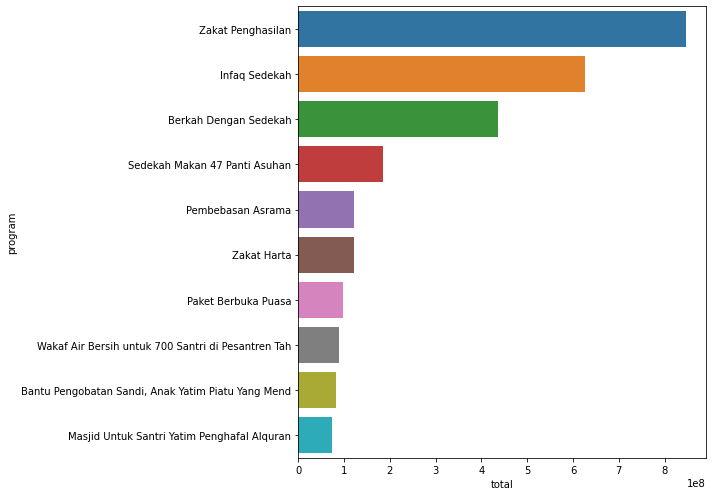

In [ ]:
x = payment_clean()
program = x.groupby('program')['nominal'].agg(total=sum).sort_values('total', ascending=False).reset_index().head(10)

plt.figure(figsize=(10,7))
sns.barplot(y=program['program'], x=program['total'], orient='h')
plt.tight_layout()

## Akad

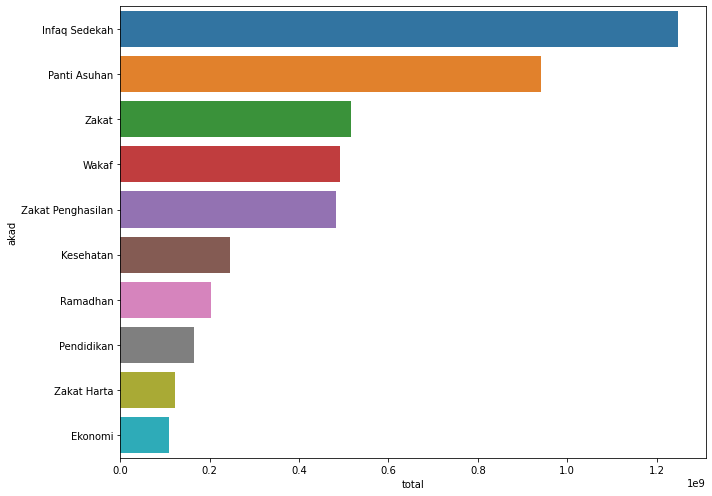

In [ ]:
y = payment_clean()
akad = y.groupby('akad')['nominal'].agg(total=sum).sort_values('total', ascending=False).reset_index().head(10)

plt.figure(figsize=(10,7))
sns.barplot(y=akad['akad'], x=akad['total'], orient='h')
plt.tight_layout()

# Donator Segmenting (RFM)

## Recency

In [ ]:
def recency():

    x = payment_clean()
    
    recency = x.groupby('id_donatur')['tanggal'].agg(tertinggi=max).sort_values('tertinggi',ascending=False).reset_index()
    recency['sekarang'] = pd.to_datetime(dt.date.today().strftime("%Y-%m-%d"))
    recency['recency'] = recency['sekarang'] - recency['tertinggi']
    recency['recency'] = recency['recency'].dt.days
    recency = recency.drop(['tertinggi','sekarang'],axis=1)
    # per 7 April 2022

    recency_score = []

    for index, rows in recency.iterrows():
        if rows['recency'] <= 279:
                recency_score.append(3)
        elif rows['recency'] <= 571:
                recency_score.append(2)
        else:
                recency_score.append(1)

    recency['recency_score'] = recency_score
    recency['id_donatur'] = recency['id_donatur'].astype(int)
    
    return recency

recency()

,id_donatur,recency,recency_score
0,31812,48,3
1,25104,48,3
2,28057,48,3
3,36132,49,3
4,36101,49,3
...,...,...,...
10166,27242,830,1
10167,27238,834,1
10168,27237,835,1
10169,27229,840,1


## Frequency

In [ ]:
def frequency():
    
    freq = loyal()

    freq_score = []

    for index, rows in freq.iterrows():
        if rows['Frequencies'] <= 22:
            freq_score.append(1)
        elif rows['Frequencies'] <= 53:
            freq_score.append(2)
        else:
            freq_score.append(3)


    freq['frequency_score'] = freq_score
    freq = freq.reset_index().drop('index',axis=1)
    freq['id_donatur'] = freq['id_donatur'].astype(int)
    #freq = freq[['Loyalists','frequency_score']]
    
    return freq

frequency()

,id_donatur,Frequencies,frequency_score
0,27510,1123,3
1,26765,339,3
2,36006,227,3
3,23355,212,3
4,15314,210,3
...,...,...,...
10166,28716,1,1
10167,28710,1,1
10168,28708,1,1
10169,28707,1,1


## Monetary

In [ ]:
def monetary():

    monetary = big()

    monetary_score = []

    for index, rows in monetary.iterrows():
        if rows['Donations'] <= 50000:
            monetary_score.append(1)
        elif rows['Donations'] <= 250000:
            monetary_score.append(2)
        else:
            monetary_score.append(3)

    monetary['monetary_score'] = monetary_score
    monetary = monetary.reset_index()
    monetary = monetary.rename(columns={'total':'monetary'})

    return monetary

monetary()

,index,id_donatur,Donations,monetary_score
0,3563,26312,89031207,3
1,592,15314,43528821,3
2,3155,23355,35240000,3
3,9742,35496,32500000,3
4,5835,29522,27968750,3
...,...,...,...,...
10166,3608,26402,18,1
10167,3624,26431,7,1
10168,4867,28188,5,1
10169,3816,26712,1,1


In [ ]:
rfm1 = recency().merge(frequency(), on='id_donatur').merge(monetary(), on='id_donatur')
rfm1['total_score'] = (rfm1['recency_score'] + rfm1['frequency_score'] + rfm1['monetary_score'])
rfm_new = rfm1[['id_donatur','recency_score', 'frequency_score', 'monetary_score']].astype(str)
rfm_new['segmentation_score'] = rfm_new['recency_score'] + rfm_new['frequency_score'] + rfm_new['monetary_score']

rfm_new

,id_donatur,recency_score,frequency_score,monetary_score,segmentation_score
0,31812,3,1,3,313
1,25104,3,3,3,333
2,28057,3,3,3,333
3,36132,3,1,2,312
4,36101,3,1,3,313
...,...,...,...,...,...
10166,27242,1,1,3,113
10167,27238,1,1,2,112
10168,27237,1,1,2,112
10169,27229,1,1,3,113


In [ ]:
segmentation = []

for index, rows in rfm_new.iterrows():
    if rows['segmentation_score'] == '333':
            segmentation.append('Champion Best Donator')
    elif rows['segmentation_score'] == '332':
            segmentation.append('Champion Best Donator')
    elif rows['segmentation_score'] == '331':
            segmentation.append('Potential High Donator')
    elif rows['segmentation_score'] == '323':
            segmentation.append('Champion Best Donator')
    elif rows['segmentation_score'] == '322':
            segmentation.append('Potential High Donator')
    elif rows['segmentation_score'] == '321':
            segmentation.append('General Donator')
    elif rows['segmentation_score'] == '313':
            segmentation.append('General Donator')
    elif rows['segmentation_score'] == '312':
            segmentation.append('General Donator')
    elif rows['segmentation_score'] == '311':
            segmentation.append('General Donator')
    elif rows['segmentation_score'] == '233':
            segmentation.append('Champion Best Donator')
    elif rows['segmentation_score'] == '232':
            segmentation.append('Potential High Donator')
    elif rows['segmentation_score'] == '231':
            segmentation.append('General Donator')
    elif rows['segmentation_score'] == '223':
            segmentation.append('Potential High Donator')
    elif rows['segmentation_score'] == '222':
            segmentation.append('General Donator')
    elif rows['segmentation_score'] == '221':
            segmentation.append('About to Sleep')
    elif rows['segmentation_score'] == '213':
        segmentation.append('General Donator')
    elif rows['segmentation_score'] == '212':
        segmentation.append('About to Sleep')
    elif rows['segmentation_score'] == '211':
        segmentation.append('About to Sleep')
    elif rows['segmentation_score'] == '133':
        segmentation.append('Churned Best Donator')
    elif rows['segmentation_score'] == '132':
        segmentation.append('Churned Best Donator')   
    elif rows['segmentation_score'] == '131':
        segmentation.append('About to Sleep') 
    elif rows['segmentation_score'] == '123':
        segmentation.append('Churned Best Donator')
    elif rows['segmentation_score'] == '122':
        segmentation.append('Churned Best Donator')   
    elif rows['segmentation_score'] == '121':
        segmentation.append('About to Sleep')
    elif rows['segmentation_score'] == '113':
        segmentation.append('About to Sleep')
    elif rows['segmentation_score'] == '112':
        segmentation.append('About to Sleep')
    else:
        segmentation.append('About to Sleep')

In [ ]:
rfm_new['segmentation'] = segmentation
rfm_new['segmentation'].value_counts().sum()

10171

## Final Merge

In [ ]:
z = payment_clean()
z = z.fillna('unknown')
z['id_transaksi'] = z['id_transaksi'].astype(int)
z['id_donatur'] = z['id_donatur'].astype(int)
z['nominal'] = z['nominal'].astype(int)
z

,tanggal,id_transaksi,id_donatur,nominal,akad,program,payment,platform,type_trans
0.0,2022-03-12,47409,31812,100000,Wakaf,Gerakan Wakaf 10.000 Al Quran untuk Indonesia,gopay,CFD v2,ONLINE_DONATION
1.0,2022-03-12,47408,31812,100000,Infaq Sedekah,"Yuk Sedekah Jumat, Berbagi Makan dengan Para Tamu",gopay,CFD v2,ONLINE_DONATION
2.0,2022-03-12,47400,25104,20000,Infaq Sedekah,sedekah subuh,bri,Android,ONLINE_DONATION
3.0,2022-03-12,47399,28057,50000,Panti Asuhan,Panti Asuhan Kahfi 2 Jakarta Selatan,gopay,CFD v2,ONLINE_DONATION
4.0,2022-03-11,4413,18008,50000,Zakat Penghasilan,Zakat Penghasilan,bank transfer,CFD v2,ONLINE_ZAKAT
...,...,...,...,...,...,...,...,...,...
24448.5,2019-12-18,0,0,0,unknown,unknown,unknown,unknown,unknown
24449.0,2019-12-17,129,25812,100,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,gopay,unknown,ONLINE_DONATION
24450.0,2019-12-17,130,25812,100,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,gopay,unknown,ONLINE_DONATION
24451.0,2019-12-17,137,25812,100,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,gopay,unknown,ONLINE_DONATION


In [ ]:
rfm_new = rfm_new[['id_donatur', 'segmentation']]
rfm_new['id_donatur'] = rfm_new['id_donatur'].astype(int)
rfm_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_donatur,segmentation
0,31812,General Donator
1,25104,Champion Best Donator
2,28057,Champion Best Donator
3,36132,General Donator
4,36101,General Donator
...,...,...
10166,27242,About to Sleep
10167,27238,About to Sleep
10168,27237,About to Sleep
10169,27229,About to Sleep


In [ ]:
rfm_new['segmentation'].value_counts(dropna=False).sum()

10171

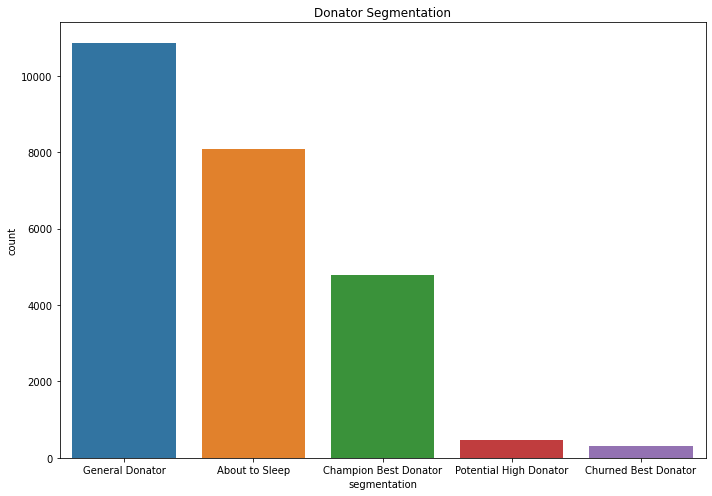

In [ ]:
end = pd.merge(y, rfm_new, on='id_donatur', how='left')
end = end.sort_values('tanggal', ascending=False)

plt.figure(figsize=(10,7))
sns.countplot(end.segmentation, order=end.segmentation.value_counts().index)

plt.title('Donator Segmentation')
plt.tight_layout();

# Forecasting

## FBProphet

In [ ]:
link = 'https://docs.google.com/spreadsheets/d/1oXIdTLOS2ufQCffScm_-HHv8tLIO8mm5Z_LwbZQlmrs/export'

In [ ]:
df = pd.read_excel(link)

In [ ]:
df = df.rename(columns={'tanggal':'ds', 'donasi':'y'})
df = df.sort_values('ds',ascending=True).reset_index().drop('index',axis=1)
df

,ds,y
0,2019-12-17,650300.0
1,2019-12-18,0.0
2,2019-12-19,0.0
3,2019-12-20,0.0
4,2019-12-21,0.0
...,...,...
812,2022-03-08,2460400.0
813,2022-03-09,520000.0
814,2022-03-10,1331062.0
815,2022-03-11,7382305.0


In [ ]:
df.groupby(df['ds'].dt.month)['y'].agg(nominal=sum).sort_values('nominal',ascending=False)

,nominal
ds,
5,869524637.0
8,438897767.0
1,420599602.0
9,418954220.0
12,413541271.0
10,382589134.0
2,362087574.0
4,295696181.0
11,281262432.0


In [ ]:
pd.date_range(start='2019-12-17', end='2022-03-12').difference(df.ds)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

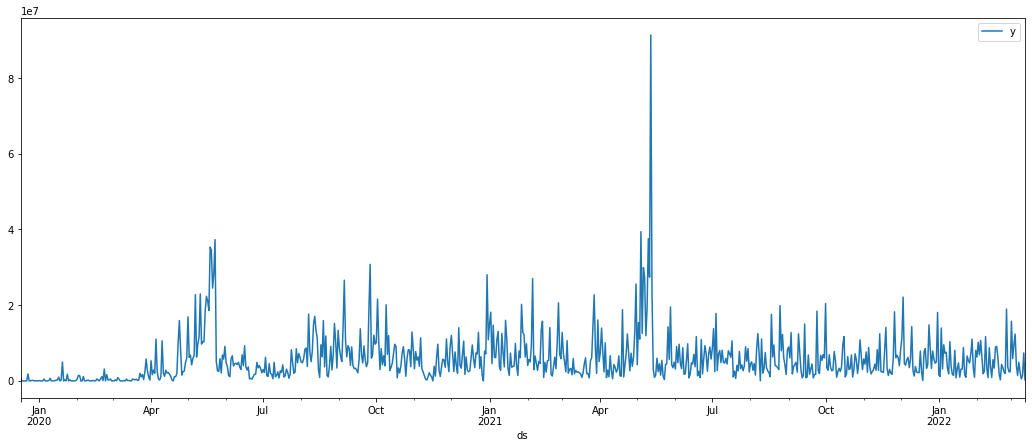

In [ ]:
df.plot('ds','y',figsize=(18,7))

In [ ]:
df['ds'].quantile(0.80)

Timestamp('2021-09-29 19:12:00')

In [ ]:
cut = pd.to_datetime('2021-11-01')
train = df[df['ds'] < cut]
test = df[df['ds'] >= cut]

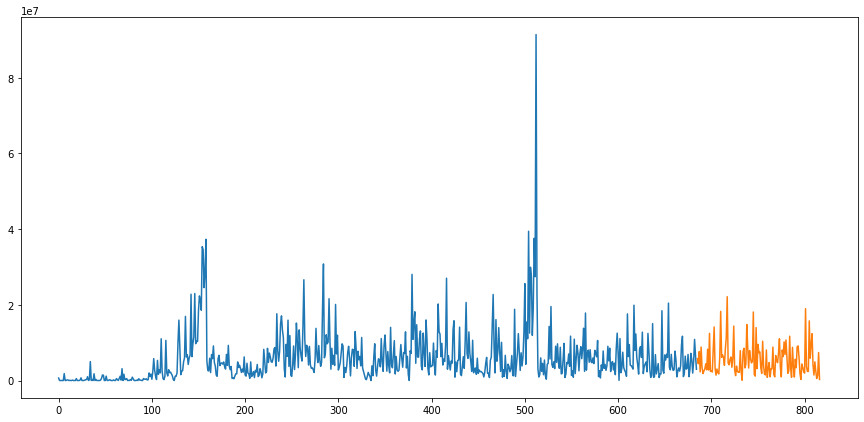

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
train['y'].plot(ax=ax)
test['y'].plot(ax=ax)
plt.show()

In [ ]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
train

,ds,y
0,2019-12-17,650300.0
1,2019-12-18,0.0
2,2019-12-19,0.0
3,2019-12-20,0.0
4,2019-12-21,0.0
...,...,...
680,2021-10-27,1957000.0
681,2021-10-28,5052067.0
682,2021-10-29,10865000.0
683,2021-10-30,6588252.0


In [ ]:
test

,ds,y
685,2021-11-01,5785000.0
686,2021-11-02,4425882.0
687,2021-11-03,7650000.0
688,2021-11-04,2278000.0
689,2021-11-05,8832973.0
...,...,...
812,2022-03-08,2460400.0
813,2022-03-09,520000.0
814,2022-03-10,1331062.0
815,2022-03-11,7382305.0


In [ ]:
lebaran = pd.DataFrame({
    'holiday' : 'lebaran',
    'ds' : pd.to_datetime(['2020-05-23','2021-05-12',  
                           '2022-05-02', '2023-04-21']),
    'lower_window' : -15,
    'upper_window' : 15
})

In [ ]:
lebaran

,holiday,ds,lower_window,upper_window
0,lebaran,2020-05-23,-15,15
1,lebaran,2021-05-12,-15,15
2,lebaran,2022-05-02,-15,15
3,lebaran,2023-04-21,-15,15


In [ ]:
model = Prophet(holidays=lebaran, holidays_prior_scale=0.1)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
pred = model.predict(test)

In [ ]:
future = model.make_future_dataframe(periods = 515, freq = 'D') #202 data (test size)
forecast = model.predict(future)

forecast.loc[(forecast['yhat'] < 0),['yhat']] = 0
#forecast.loc[(forecast['yhat_lower'] < 0),['yhat']] = 0
plot_plotly(model, forecast)

In [ ]:
prediction_forecast = forecast[['ds','yhat','yhat_lower','yhat_upper']]

prediction_forecast = prediction_forecast[prediction_forecast['ds'] > '2022-03-12']

prediction_forecast.to_excel('prediction_forecast.xlsx')

In [ ]:
prediction_forecast

,ds,yhat,yhat_lower,yhat_upper
817,2022-03-13,2.188048e+06,-3.082750e+06,7.290369e+06
818,2022-03-14,4.066720e+06,-1.290059e+06,9.566267e+06
819,2022-03-15,3.966016e+06,-1.313391e+06,8.916195e+06
820,2022-03-16,3.911394e+06,-1.605674e+06,8.845958e+06
821,2022-03-17,2.769223e+06,-2.580757e+06,7.806863e+06
...,...,...,...,...
1195,2023-03-26,0.000000e+00,-6.744193e+06,5.239833e+06
1196,2023-03-27,2.089466e+06,-4.487931e+06,8.296191e+06
1197,2023-03-28,3.056046e+06,-3.183020e+06,9.676053e+06
1198,2023-03-29,3.962979e+06,-2.182783e+06,1.008481e+07


In [ ]:
model2 = Prophet(holidays=lebaran, holidays_prior_scale=1, changepoint_prior_scale=0.1)
model2.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model2.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_month = model2.make_future_dataframe(periods = 17, freq = 'M') #202 data (test size)
forecast_month = model2.predict(future_month)

forecast_month.loc[(forecast_month['yhat'] < 0),['yhat']] = 0
plot_plotly(model, forecast_month)

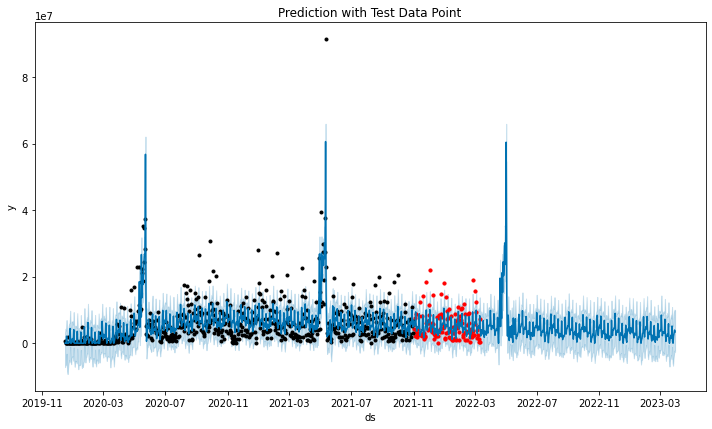

In [ ]:
fig = model.plot(forecast)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.grid(False)
plt.title('Prediction with Test Data Point')
plt.show()

In [ ]:
plot_plotly(model, forecast)

In [ ]:
rmse = np.sqrt(mean_squared_error(test['y'], pred['yhat']))

print('rmse score eval with test data: {}'.format(rmse))

rmse score eval with test data: 3256007.4015761907


In [ ]:
r2 = (r2_score(test['y'], pred['yhat']))

print('r2 score eval with test data: {}'.format(r2))

r2 score eval with test data: 0.416227318867613


In [ ]:
plot_components_plotly(model, forecast)

In [ ]:
from fbprophet.diagnostics import cross_validation

cv = cross_validation(model, initial='365 days', horizon='120 days')
cv

INFO:fbprophet:Making 4 forecasts with cutoffs between 2021-01-04 00:00:00 and 2021-07-03 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-01-05,7.835413e+06,2.544928e+06,1.339414e+07,6214702.0,2021-01-04
1,2021-01-06,8.198064e+06,2.690098e+06,1.361826e+07,6165977.0,2021-01-04
2,2021-01-07,7.249166e+06,1.574912e+06,1.262094e+07,10997619.0,2021-01-04
3,2021-01-08,1.029233e+07,4.877232e+06,1.622527e+07,13092814.0,2021-01-04
4,2021-01-09,7.411928e+06,1.645064e+06,1.301814e+07,3775627.0,2021-01-04
...,...,...,...,...,...,...
475,2021-10-27,6.604762e+06,1.001391e+06,1.218652e+07,1957000.0,2021-07-03
476,2021-10-28,6.299883e+06,8.449012e+05,1.138671e+07,5052067.0,2021-07-03
477,2021-10-29,1.043297e+07,5.189770e+06,1.570240e+07,10865000.0,2021-07-03
478,2021-10-30,6.341092e+06,8.026762e+05,1.207546e+07,6588252.0,2021-07-03


In [ ]:
cv['cutoff'].unique()
cutoff1 = cv[cv['cutoff'] == '2021-01-04']
cutoff2 = cv[cv['cutoff'] == '2021-03-05']
cutoff3 = cv[cv['cutoff'] == '2021-05-04']
cutoff4 = cv[cv['cutoff'] == '2021-07-03']

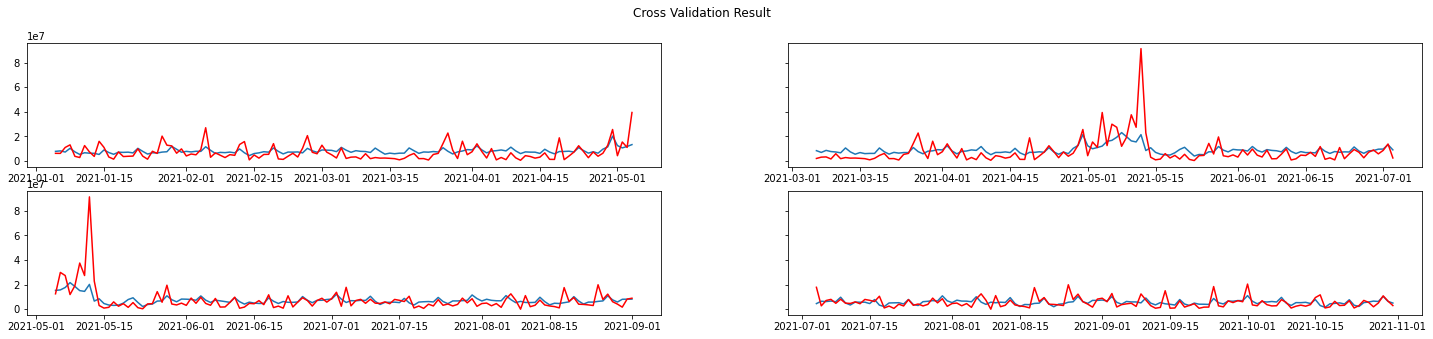

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(25,5), sharey=True)


ax[0,0].plot(cutoff1['ds'],cutoff1['yhat'], label='prediction')
ax[0,0].plot(cutoff1['ds'],cutoff1['y'],c='red', label='actual')

ax[0,1].plot(cutoff2['ds'],cutoff2['yhat'], label='prediction')
ax[0,1].plot(cutoff2['ds'],cutoff2['y'],c='red', label='actual')

ax[1,0].plot(cutoff3['ds'],cutoff3['yhat'], label='prediction')
ax[1,0].plot(cutoff3['ds'],cutoff3['y'],c='red', label='actual')

ax[1,1].plot(cutoff4['ds'],cutoff4['yhat'], label='prediction')
ax[1,1].plot(cutoff4['ds'],cutoff4['y'],c='red', label='actual')

plt.suptitle('Cross Validation Result')
plt.show()

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,12 days,1.496807e+14,1.223441e+07,6.260462e+06,1.053082,0.632933,0.708333
1,13 days,1.458601e+14,1.207725e+07,6.020241e+06,1.073317,0.632933,0.750000
2,14 days,1.428462e+14,1.195183e+07,5.824245e+06,1.052833,0.632933,0.729167
3,15 days,1.402944e+14,1.184459e+07,5.547819e+06,1.051642,0.671601,0.750000
4,16 days,1.388564e+14,1.178374e+07,5.464172e+06,1.115298,0.698558,0.770833
...,...,...,...,...,...,...,...
104,116 days,1.904227e+13,4.363745e+06,3.068169e+06,0.990541,0.338559,0.833333
105,117 days,1.642061e+13,4.052235e+06,2.875975e+06,0.962289,0.338559,0.854167
106,118 days,1.282797e+13,3.581615e+06,2.599526e+06,0.794045,0.265315,0.895833
107,119 days,1.211455e+13,3.480596e+06,2.415518e+06,0.717338,0.247201,0.895833
